#### Exercise ####


#### Please refer to module 2 of IntermediateClustering - Hierarchical for Tasks 1-7
#### Task 1
##### Load packages you need to prepare data for and perform hierarchical clustering.


#### Result:


In [6]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from scipy import cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering



#### Task 2
##### Set your working directory and read in the exercise dataset `heart_failure_clinical_records_dataset.csv`
##### Check if there are any missing values in the dataset you have loaded.
##### Make sure to fill any missing values (if necessary) with the appropriate metric like mean.


#### Result:


In [30]:
current_dir = Path(".").resolve()
main_dir = current_dir.parent.parent
data_dir = str(main_dir) + "/data/"
ex_df = pd.read_csv(str(data_dir)+ 'heart_failure_clinical_records_dataset.csv')

print(ex_df.isna().sum())
#ex_df = ex_df.fillna(ex_df.mean())




age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
id                          0
dtype: int64


#### Task 3
##### Subset the dataset to just have numeric columns.
##### The numeric columns used here are: `['time', 'age', 'ejection_fraction', 'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'serum_creatinine']`.
##### Take a look at the first few rows.
#### Result:


In [31]:
ex_df = ex_df.select_dtypes([np.number])
ex_df.dtypes


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
death_event                   int64
id                            int64
dtype: object

In [32]:
ex_df = ex_df.set_index('id')
ex_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
id,,,,,,,,,,,,,
1,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
2,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
4,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
5,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
296,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
297,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0


In [33]:
ex_df_cluster = ex_df.drop(['death_event','high_blood_pressure','sex','smoking','diabetes'], axis = 1)



In [34]:
ex_df_cluster.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
ejection_fraction             int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
time                          int64
dtype: object

#### Task 4
##### Instantiate the MinMaxScaler and scale the data.


#### Result: 


In [35]:
ex_scaler = MinMaxScaler()

ex_df_cluster_scaled = ex_scaler.fit_transform(ex_df_cluster)

ex_df_hier = pd.DataFrame(ex_df_cluster_scaled, columns = ex_df_cluster.columns)



#### Task 5
##### Compute distance between points in your scaled data (use appropriate distance metric).
##### Compute the linkage matrix using the 'ward' method.
#### Result:


In [43]:
ex_df_dist = pdist(ex_df_hier, 'correlation')

ex_df_linked = linkage(ex_df_dist, 'ward')



#### Task 6
##### Plot a pruned dendrogram of the resulting linkage matrix (you can experiment with the value of p).


#### Result:


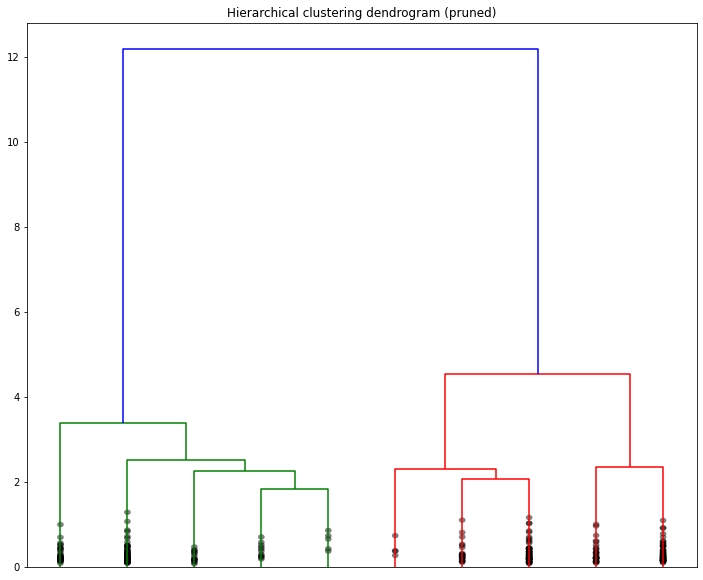

In [41]:
# Prune the tree to p=10 leaf nodes (as an example).
plt.figure(figsize=(12, 10))  
plt.title('Hierarchical clustering dendrogram (pruned)')
dendrogram(ex_df_linked,
           truncate_mode = 'lastp',   # select truncated mode
           p = 10,                    # show only last p merged clusters
           show_leaf_counts = False,  # display leaf counts
           leaf_rotation = 90,        # set the angle of leaf label rotation
           leaf_font_size = 12,       # set the font size of leaf labels 
           show_contracted = True)    # display contracted nodes
plt.show()
plt.close()

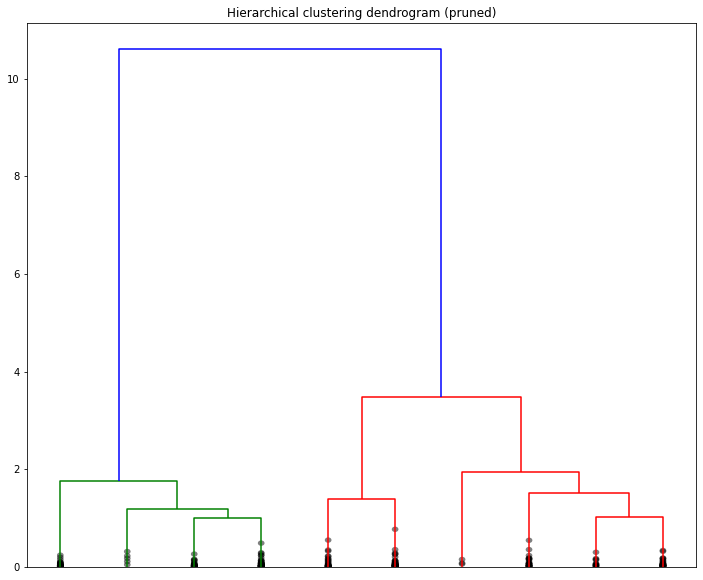

In [44]:
# Prune the tree to p=10 leaf nodes (as an example).
plt.figure(figsize=(12, 10))  
plt.title('Hierarchical clustering dendrogram (pruned)')
dendrogram(ex_df_linked,
           truncate_mode = 'lastp',   # select truncated mode
           p = 10,                    # show only last p merged clusters
           show_leaf_counts = False,  # display leaf counts
           leaf_rotation = 90,        # set the angle of leaf label rotation
           leaf_font_size = 12,       # set the font size of leaf labels 
           show_contracted = True)    # display contracted nodes
plt.show()
plt.close()





#### Task 7
##### Set up agglomerative clustering model using the `AgglomerativeClustering` method from scikit-learn 
##### on our data (use your `ex_df_hier` dataframe). Use appropriate distance/affinity metric
##### and the appropriate linkage metric.Try out a couple of values for `n_clusters` parameter.
##### Fit the data to the model, and plot the results using 2 variables.


#### Result:


[2 2 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 2 2 0 2 0 2 2 2 0 0 2 2 0
 0 2 2 2 2 2 2 0 2 2 2 0 0 0 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 0 0 0 2 2 0 2 0 2 2 2 0 2 0 0 0 0 0 0 2 2 2 2 0 2 0 2 2 2
 2 2 0 0 0 0 0 0 1 0 0 2 0 2 0 2 0 2 0 0 0 2 2 2 2 0 0 2 2 1 0 2 0 0 2 2 2
 0 2 2 2 2 2 0 0 0 2 0 0 0 0 0 0 2 1 1 2 2 2 0 2 0 0 2 0 2 0 0 1 1 0 1 1 0
 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1
 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1
 1 1 1]


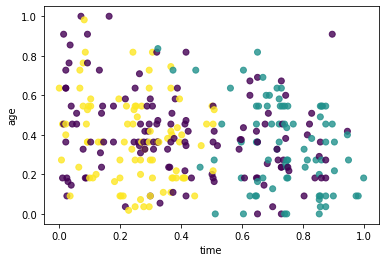

In [42]:
# Assign the data points to 3 clusters (as an example).
ex_df_clusters = AgglomerativeClustering(n_clusters = 3,        
                                         affinity = 'euclidean',
                                         linkage = 'ward')  
       
# Fit and predict based on your cluster settings.                                  
ex_df_clusters.fit_predict(ex_df_hier)
# Print the labels.
print(ex_df_clusters.labels_) 

# Plot the clusters.
plt.scatter(ex_df_hier['time'], 
            ex_df_hier['age'],
            alpha = 0.8,
            c = ex_df_clusters.labels_)
plt.xlabel('time')    
plt.ylabel('age')
plt.show()





[2 2 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 2 2 0 2 0 2 2 2 0 0 2 2 0
 0 2 2 2 2 2 2 0 2 2 2 0 0 0 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 0 0 0 2 2 0 2 0 2 2 2 0 2 0 0 0 0 0 0 2 2 2 2 0 2 0 2 2 2
 2 2 0 0 0 0 0 0 1 0 0 2 0 2 0 2 0 2 0 0 0 2 2 2 2 0 0 2 2 1 0 2 0 0 2 2 2
 0 2 2 2 2 2 0 0 0 2 0 0 0 0 0 0 2 1 1 2 2 2 0 2 0 0 2 0 2 0 0 1 1 0 1 1 0
 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1
 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1
 1 1 1]


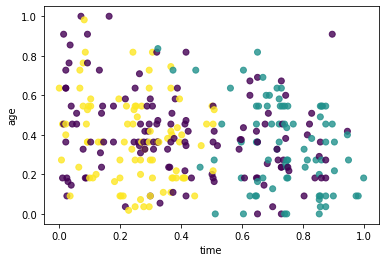

In [46]:
# Assign the data points to 3 clusters (as an example).
ex_df_clusters = AgglomerativeClustering(n_clusters = 3,        
                                         affinity = 'euclidean',
                                         linkage = 'ward')  
       
# Fit and predict based on your cluster settings.                                  
ex_df_clusters.fit_predict(ex_df_hier)
# Print the labels.
print(ex_df_clusters.labels_) 

# Plot the clusters.
plt.scatter(ex_df_hier['time'], 
            ex_df_hier['age'],
            alpha = 0.8,
            c = ex_df_clusters.labels_)
plt.xlabel('time')    
plt.ylabel('age')
plt.show()




